<h1>Fake News Detection<h1/>

dataset : https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data

<h2>importing libraries<h2/>

In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

<h2>loading the data<h2/>

In [ ]:
real_news = pd.read_csv('')
fake_news = pd.read_csv('')

In [3]:
#labeling the news columns
real_news ['label'] = 1
fake_news ['label'] = 0
#merging
df = pd.concat([real_news,fake_news], ignore_index=True)

In [4]:
df.shape

(44898, 5)

In [5]:
df.head(10)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


<h2>Text preprocessing<h2/>


In [80]:
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [6]:
stop_words = set(stopwords.words('english')) #list of syop words
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    #to convert everything in the text to lower case
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return ' '.join(words)

In [7]:
df['cleaned'] = df['text'].apply(clean_text)

In [8]:
print(df[['text','cleaned']].head(5))

                                                text  \
0  WASHINGTON (Reuters) - The head of a conservat...   
1  WASHINGTON (Reuters) - Transgender people will...   
2  WASHINGTON (Reuters) - The special counsel inv...   
3  WASHINGTON (Reuters) - Trump campaign adviser ...   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...   

                                             cleaned  
0  washington reuters head conservative republica...  
1  washington reuters transgender people allowed ...  
2  washington reuters special counsel investigati...  
3  washington reuters trump campaign adviser geor...  
4  seattlewashington reuters president donald tru...  


<h2>EDA<h2/>

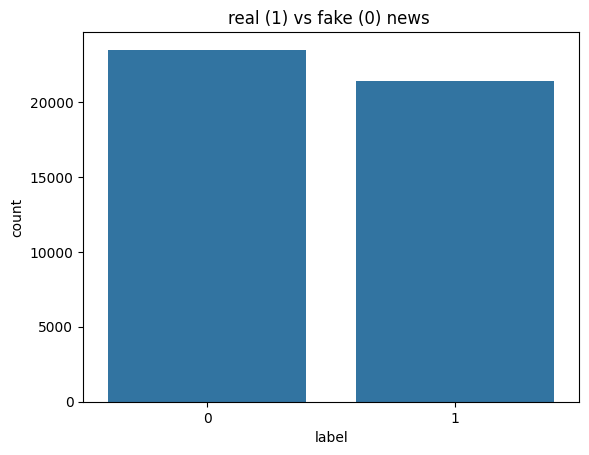

In [9]:
sns.countplot(x='label', data=df)
plt.title('real (1) vs fake (0) news ')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

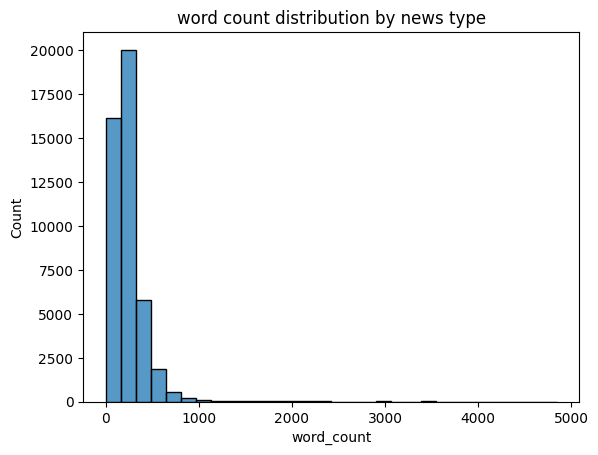

In [10]:
#text length
#counting the words of the preprocessed text
df['word_count'] = df['cleaned'].apply(lambda x: len(x.split()))

sns.histplot(data=df, x='word_count', bins=30,)
plt.title('word count distribution by news type')
plt.show

Text(0.5, 1.0, 'subject distribution')

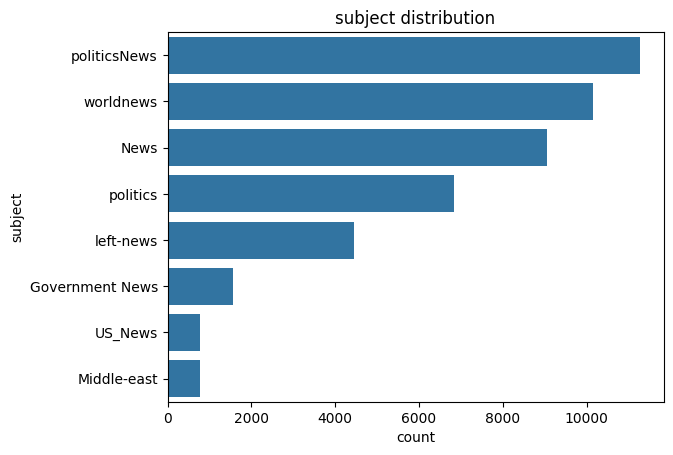

In [11]:
sns.countplot(data=df,y='subject',order=df['subject'].value_counts().index)
plt.title('subject distribution')

<h2>text vectorization <h2/>

In [12]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned'])

print(f"TF-IDF matrix shape: {X.shape}")

TF-IDF matrix shape: (44898, 5000)


<h2>splitting the data for training<h2/>

In [13]:
Y = df['label']

X_train, X_test, Y_trian, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (35918, 5000), Test set: (8980, 5000)


<h2>building the model (LogisticRegression)<h2>

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_trian)

Y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 0.9883073496659243

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4650
           1       0.98      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



<function matplotlib.pyplot.show(close=None, block=None)>

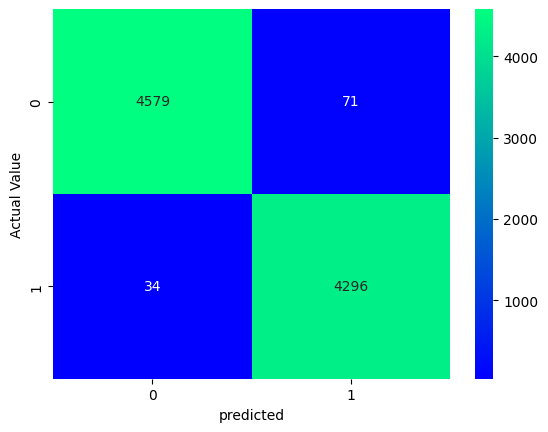

In [15]:
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap = 'winter')
plt.xlabel('predicted')
plt.ylabel('Actual Value')
plt.show